In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Data.xlsx')

In [ ]:
df

,Date,Open,High,Low,Close,LTP,Open Int,Change in OI,Underlying Value
0,2010-12-31,11701.00,11876.70,11680.00,11839.00,11841.0,1418525,26325,11791.45
1,2011-01-03,11920.00,11955.55,11876.65,11897.45,11882.0,1509700,91175,11855.75
2,2011-01-04,11950.20,11950.20,11595.00,11612.90,11608.3,1579000,69300,11564.05
3,2011-01-05,11594.00,11600.00,11325.50,11370.55,11370.0,1537100,-41900,11305.45
4,2011-01-06,11422.00,11440.00,11222.00,11255.05,11225.0,1480300,-56800,11186.80
...,...,...,...,...,...,...,...,...,...
243,2011-12-26,8327.90,8434.00,8280.35,8385.30,8382.0,1104000,-220450,8374.55
244,2011-12-27,8360.00,8368.00,8216.00,8275.35,8278.0,990275,-113725,8275.50
245,2011-12-28,8244.95,8245.00,8058.10,8121.65,8102.5,805125,-185150,8111.40
246,2011-12-29,8066.15,8146.95,8025.35,8040.95,8029.7,581475,-223650,8027.40


In [ ]:
import datetime

df["Days"] = [datetime.datetime.strftime(d, '%A') for d in df["Date "]]

In [ ]:
df

,Date,Open,High,Low,Close,LTP,Open Int,Change in OI,Underlying Value,Days
0,2010-12-31,11701.00,11876.70,11680.00,11839.00,11841.0,1418525,26325,11791.45,Friday
1,2011-01-03,11920.00,11955.55,11876.65,11897.45,11882.0,1509700,91175,11855.75,Monday
2,2011-01-04,11950.20,11950.20,11595.00,11612.90,11608.3,1579000,69300,11564.05,Tuesday
3,2011-01-05,11594.00,11600.00,11325.50,11370.55,11370.0,1537100,-41900,11305.45,Wednesday
4,2011-01-06,11422.00,11440.00,11222.00,11255.05,11225.0,1480300,-56800,11186.80,Thursday
...,...,...,...,...,...,...,...,...,...,...
243,2011-12-26,8327.90,8434.00,8280.35,8385.30,8382.0,1104000,-220450,8374.55,Monday
244,2011-12-27,8360.00,8368.00,8216.00,8275.35,8278.0,990275,-113725,8275.50,Tuesday
245,2011-12-28,8244.95,8245.00,8058.10,8121.65,8102.5,805125,-185150,8111.40,Wednesday
246,2011-12-29,8066.15,8146.95,8025.35,8040.95,8029.7,581475,-223650,8027.40,Thursday


Positive closes by day:
Monday: 26 out of 50
Tuesday: 22 out of 50
Wednesday: 23 out of 49
Thursday: 20 out of 47
Friday: 22 out of 52


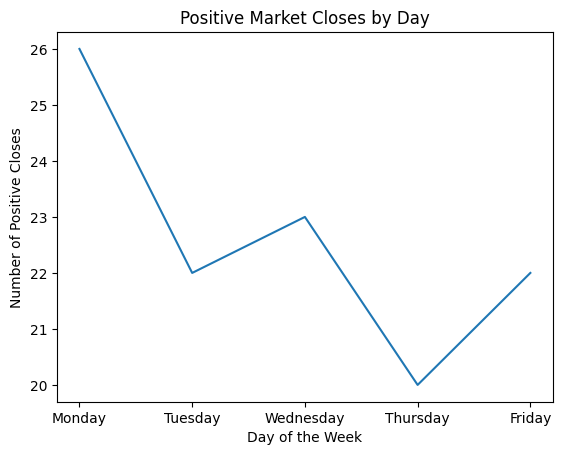

In [ ]:
def is_positive_close(row):

    if row.name == 1:
        return row['Close'] > df.iloc[-1]['Close']
    elif row.name > 1:
        return row['Close'] > df.loc[row.name - 1, 'Close']
    else:
        return False

df['Positive Close'] = df.apply(is_positive_close, axis=1)

mondays = df[df['Days'] == 'Monday']['Positive Close'].sum()
tuesdays = df[df['Days'] == 'Tuesday']['Positive Close'].sum()
wednesdays = df[df['Days'] == 'Wednesday']['Positive Close'].sum()
thursdays = df[df['Days'] == 'Thursday']['Positive Close'].sum()
fridays = df[df['Days'] == 'Friday']['Positive Close'].sum()

total_mondays = len(df[df['Days'] == 'Monday'])
total_tuesdays = len(df[df['Days'] == 'Tuesday'])
total_wednesdays = len(df[df['Days'] == 'Wednesday'])
total_thursdays = len(df[df['Days'] == 'Thursday'])
total_fridays = len(df[df['Days'] == 'Friday'])

print("Positive closes by day:")
print(f"Monday: {mondays} out of {total_mondays}")
print(f"Tuesday: {tuesdays} out of {total_tuesdays}")
print(f"Wednesday: {wednesdays} out of {total_wednesdays}")
print(f"Thursday: {thursdays} out of {total_thursdays}")
print(f"Friday: {fridays} out of {total_fridays}")

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
counts = [mondays, tuesdays, wednesdays, thursdays, fridays]
plt.plot(days, counts)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Positive Closes")
plt.title("Positive Market Closes by Day")
plt.show()

In [ ]:
if 'Date' in excel_data.columns:
    print("The column 'Date' exists in the dataset.")
else:

    first_column_name = excel_data.columns[0]
    excel_data.rename(columns={first_column_name: 'Date'}, inplace=True)
    print(f"The column '{first_column_name}' has been renamed to 'Date'.")

    excel_data.to_excel('Data1.xlsx', index=False)
    print(f"The updated dataset has been saved to {'Data1.xlsx'}.")


The column 'Date' exists in the dataset.


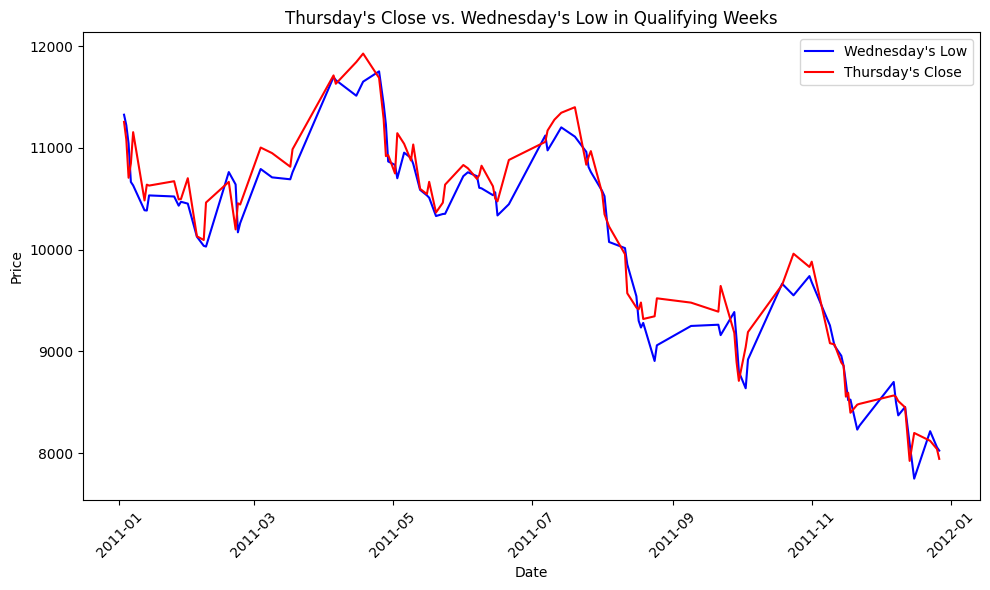

In [ ]:
qualifying_weeks = []
for i in range(len(df) - 3):
    monday_high = df['High'][i]
    tuesday_high = df['High'][i + 1]
    wednesday_high = df['High'][i + 2]
    if monday_high > tuesday_high and monday_high > wednesday_high:
        qualifying_weeks.append(i)

dates = [df['Date'][i] for i in qualifying_weeks]
wednesday_lows = [df['Low'][i + 2] for i in qualifying_weeks]
thursday_closes = [df['Close'][i + 3] for i in qualifying_weeks]

plt.figure(figsize=(10, 6))
plt.plot(dates, wednesday_lows, label="Wednesday's Low", color='blue')
plt.plot(dates, thursday_closes, label="Thursday's Close", color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Thursday's Close vs. Wednesday's Low in Qualifying Weeks")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()